# Breast Cancer Classification 

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting
from scipy import stats
plt.style.use("ggplot")

#⚠️NOTE: you have to first install plotly for the graphs to generate correctly.
# Do that using this command in the terminal:
# pip install plotly

import plotly.graph_objects as go
import plotly.express as px

from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore")

In [31]:
# read in data as a pandas data frame
#⚠️Change to your own directory
data = pd.read_csv("data.csv")

In [32]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
data.shape 

(569, 33)

In [34]:
data.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [35]:
#get rid of id column and the unnamed column since we don't need them
data = data.drop(['id','Unnamed: 32'],axis = 1)

In [36]:
#Check to make sure last step worked
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## <span style="color:blue">Exploratory Data Analysis</span> 

### <span style="color:green">Basic Summary Stats</span> 

In [37]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


📊Case counts

In [38]:
y = data.diagnosis 

Number of Benign:  357
Number of Malignant :  212


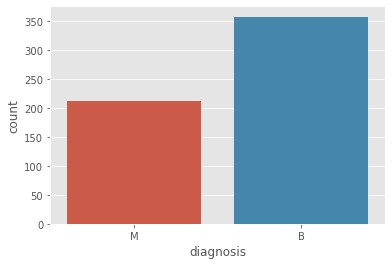

In [39]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

### <span style="color:green">Histogram</span> 

- Plotting a histogram of the frequency of benign vs malignant cases


In [40]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']

fig = go.Figure()
fig.add_trace(go.Histogram(x=radius_mean_b, name = 'Benign'))
fig.add_trace(go.Histogram(x=radius_mean_m, name = 'Malignant'))

# Overlay histograms
fig.update_layout(title = 'Histogram of radius_mean', 
                  title_x = 0.5,
                  xaxis_title ='Radius Mean Value',
                  yaxis_title = 'Value Counts',
                  barmode='overlay')

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()
print(f'Mean of radius_mean values (Benign): {radius_mean_b.mean()}')
print(f'Mean of radius_mean values (Malignant): {radius_mean_m.mean()}')

Mean of radius_mean values (Benign): 12.14652380952381
Mean of radius_mean values (Malignant): 17.46283018867925


We can see that the benign is mostly normally distributed, but the malignant is less so. It looks like there are some outliers at the higher end of the radius mean values spectrum. We will investigate this in the next step. 

### <span style="color:green">Finding Outliers</span> 

Sometimes, data points in our dataset will fall outside the range expected. It is important to detect these points so that they can be removed. Filtering out this data could potentially increase the accuracy of our model. At a minimum, we need to understand the data so we can create the best classifier. 

📦 Box Plot (visually see outliers)

In [41]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']

fig = go.Figure()
fig.add_trace(go.Box(y=radius_mean_m, name='Malignant', marker_color = 'indianred'))
fig.add_trace(go.Box(y=radius_mean_b, name = 'Benign', marker_color = 'lightseagreen'))

fig.update_layout(title='Distribution of radius_mean for Benign and Malignant Class',
                  title_x = 0.5,
                  xaxis_title = 'Feature',
                  yaxis_title = 'Value',
                  height = 400,
                  width = 800)
fig.show()

Interquartile range (Mathematically detect outliers)

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [42]:
def find_outliers(radius_mean):
    
    # Calculating interquartile range
    desc = radius_mean.describe()
    Q1 = desc[4] #25%
    Q3 = desc[6] #75%
    IQR = Q3-Q1

    # Calculate Outlier Cutoff
    #We can then calculate the cutoff for outliers as 1.5 times the IQR and subtract this cut-off 
    #from the 25th percentile and add it to the 75th percentile to give the actual limits on the data.
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Apply cutoff to find outliers
    a = radius_mean[radius_mean < lower_bound].values 
    b = radius_mean[radius_mean > upper_bound].values
    outliers = np.concatenate([a,b], axis = 0)

    print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
    print(f'Outliers: {outliers}')


In [43]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']
find_outliers(radius_mean_m)
find_outliers(radius_mean_b)

Anything outside this range is an outlier: ( 8.302500000000002 , 26.362499999999997 )
Outliers: [27.22 28.11 27.42]
Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers: [ 6.981 16.84  17.85 ]


This dataset is not large, so we have decided to keep all the data points just to be safe. 

### <span style="color:green"> Pearsons Correlation</span> 

- Pearson correlation coefficient is a measure of linear association. Two variables can be perfectly related, but if the relationship is not linear, Pearson's correlation coefficient is not an appropriate statistic for measuring their association.
- Pearson correlation coefficients and assumes that the data are linearly related and that the residuals are normally distributed.
- Pearson correlation is the most common form of correlation. It is a parametric test.

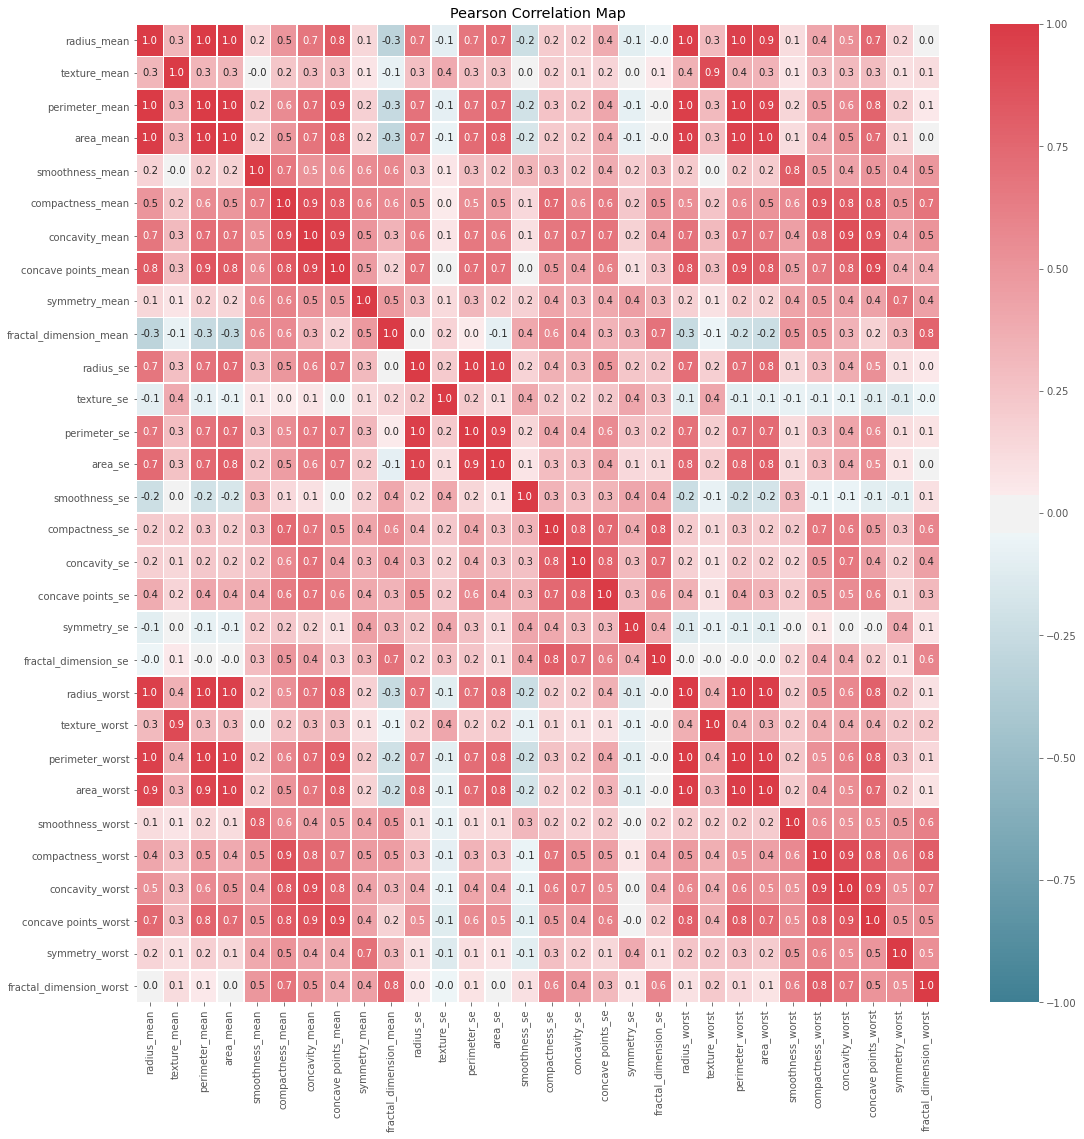

In [44]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(method='pearson'),cmap=cmap, annot= True,linewidths=0.6,fmt = ".1f",ax=ax, vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Pearson Correlation Map')
#plt.savefig('graph.png')
plt.show()

- Values close to 1 in absolute value -> strong linear association, positive or negative from sign
- Values close to 0 imply little or no association

The highest correlations are between:
- radius_mean and perimeter_mean, area_mean, radius_worst, perimeter_worst
- area_mean and radius_mean, perimeter_mean, radius_worst, perimeter_worst, area_worst
- perimeter_mean and radius_worst
- area_worst and radius_worst
- perimeter_worst and radius_worst, perimeter_mean, area_worst, area_mean, radius_mean
- texture_mean and texture_worst

We are going to check out these in a little more detail next

### <span style="color:green"> Relationship between Variables</span> 

We want to see if any two variables are related to each other (either positively, negatively, or not at all). This can be seen in a scatter plot with a KDE plot. A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Text(0.5, 1.0, 'Relation between radius_mean and area_mean')

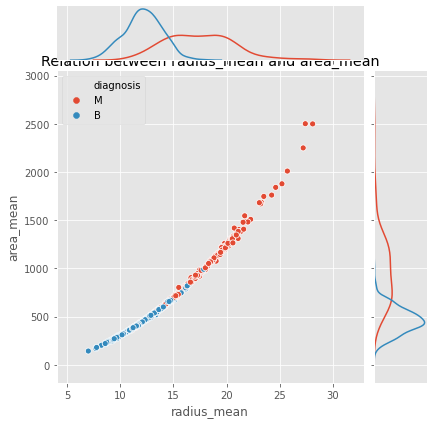

In [45]:
#Highly Correlated Pairs

#radius_mean vs area_mean
grid = sns.JointGrid(x='radius_mean', y='area_mean', data=data)

g = grid.plot_joint(sns.scatterplot, hue='diagnosis', data=data)
sns.kdeplot(data.loc[data['diagnosis']=='M', 'radius_mean'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='B', 'radius_mean'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='M', 'area_mean'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='B', 'area_mean'], ax=g.ax_marg_y, vertical=True, legend=False)
plt.title('Relation between radius_mean and area_mean')


We observe that some of the correlated pairs are showing as well a good separation between data with diagnosis B and data with diagnosis M. Let’s see the pairs inverse correlated.

Text(0.5, 1.0, 'Relation between fractal_dimension_mean and radius_worst')

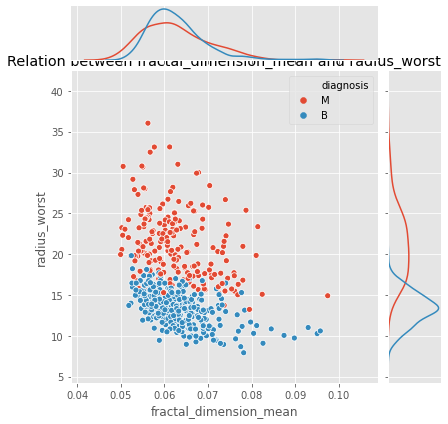

In [46]:
#Inversely correlated Pairs

#fractal_dimension_mean vs radius_worst
grid = sns.JointGrid(x='fractal_dimension_mean', y='radius_worst', data=data)

g = grid.plot_joint(sns.scatterplot, hue='diagnosis', data=data)
sns.kdeplot(data.loc[data['diagnosis']=='M', 'fractal_dimension_mean'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='B', 'fractal_dimension_mean'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='M', 'radius_worst'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='B', 'radius_worst'], ax=g.ax_marg_y, vertical=True, legend=False)
plt.title('Relation between fractal_dimension_mean and radius_worst')


Text(0.5, 1.0, 'Relation between concavity_worst and symmetry_se')

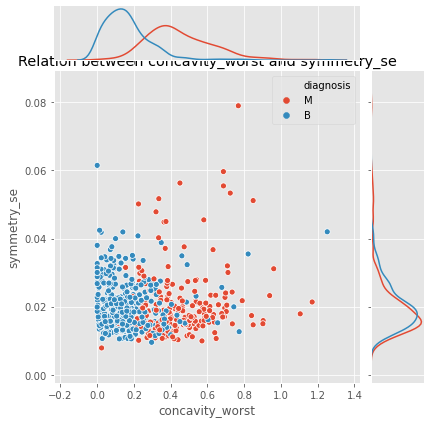

In [47]:
#Lowly Correlated Pairs

#concavity_worst vs symmetry_se
grid = sns.JointGrid(x='concavity_worst', y='symmetry_se', data=data)

g = grid.plot_joint(sns.scatterplot, hue='diagnosis', data=data)
sns.kdeplot(data.loc[data['diagnosis']=='M', 'concavity_worst'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='B', 'concavity_worst'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='M', 'symmetry_se'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(data.loc[data['diagnosis']=='B', 'symmetry_se'], ax=g.ax_marg_y, vertical=True, legend=False)
plt.title('Relation between concavity_worst and symmetry_se')

### <span style="color:green">Principle Component Analysis</span> 

Principal component analysis (PCA) is a mathematical procedure that transforms a number of (possibly) correlated variables into a smaller number of uncorrelated variables called principal components. This data has 30 dimensions, but it is reduced here into 2 principal components to see whether variables can be separated into clusters. Two target classes, where dark is benign and light is malignant, are almost linearly separable. 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
warnings.filterwarnings('ignore')

df = pd.read_csv("/Users/nikolasvankeersbilck/Desktop/data.csv", index_col = 'id')
df.drop('Unnamed: 32',axis = 1 ,inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
X = df.drop('diagnosis',axis = 1)

Projecting 30-dimensional data to 2D


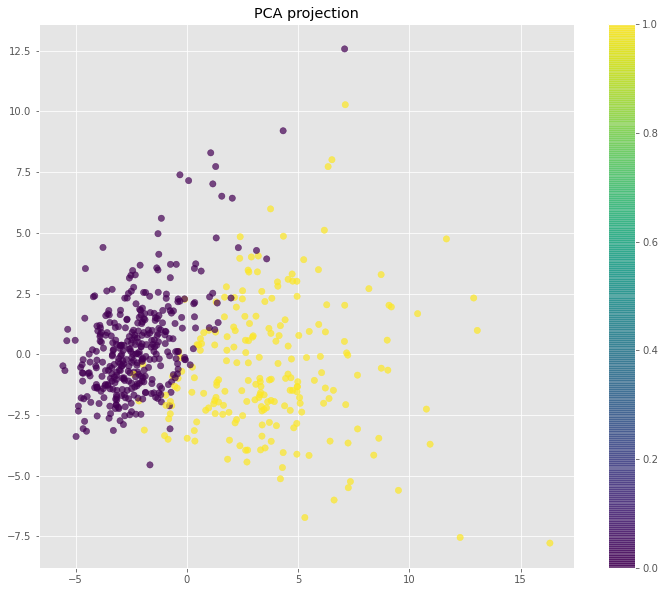

In [50]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, svd_solver='full')

X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

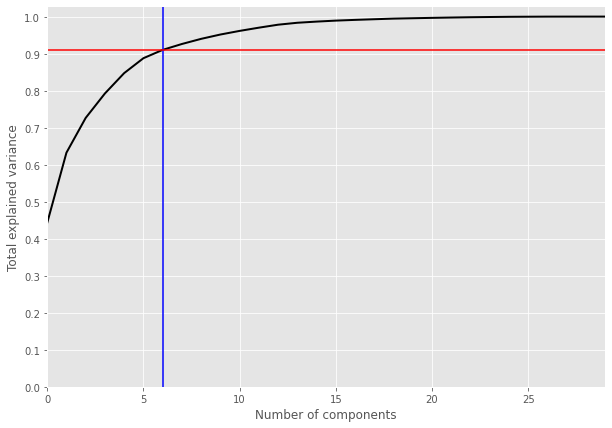

In [51]:
from sklearn import decomposition

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show();

 The first 6 components correspond to approximately 91% of the cumulative sum over all the variance.

## <span style="color:blue">Preparing data for classifiers</span> 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

data = pd.read_csv("data.csv")


#get rid of id column and the unnamed one since we don't need that
data = data.drop(['Unnamed: 32','id'],axis = 1)
#Changing malignant and benign into 1 and 0 respectively
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

#For dropping features 

#perimeters = [x for x in data.columns if 'perimeter' in x]
#areas = [x for x in data.columns if 'area' in x]
#data.drop(perimeters, axis = 1 ,inplace = True)
#data.drop(areas, axis = 1 ,inplace = True)
#worst = [col for col in data.columns if col.endswith('_worst')]
#data.drop(worst, axis = 1 ,inplace = True)


#Splitting data into training and testing datasets
#trainData, testData = train_test_split(data, test_size = 0.3)

#Features and labels 
features= list(data.columns[1:11])
labels = list(data.columns[0:1])

## <span style="color:blue">Function to create and test classifiers 🤖</span> 

In [53]:
#Generic function for making a classification model and assessing the performance. 

def classification_model(model, data, predictors, outcome,regression):

  trainData, testData = train_test_split(data, test_size = 0.2)

  #Fit the model:
  model.fit(trainData[predictors],trainData[outcome])


  #Make predictions on training set:
  predictions = model.predict(testData[predictors])

  
  #Print accuracy
  #We use r2 as a metric if XGboost (regression) is used
  if(regression):
    predictions = np.round(predictions,0)
    print(predictions)
    accuracy = metrics.accuracy_score(predictions,testData[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    cf_matrix = metrics.confusion_matrix(testData[outcome], predictions)
    sns.heatmap(cf_matrix,annot=True,cmap='Blues', fmt='g')
  else:
    accuracy = metrics.accuracy_score(predictions,testData[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    cf_matrix = metrics.confusion_matrix(testData[outcome], predictions)
    sns.heatmap(cf_matrix,annot=True,cmap='Blues', fmt='g')
    

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits = 5)
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])

## <span style="color:blue">Random Forest 🌳 Classifier</span> 

Accuracy : 91.228%


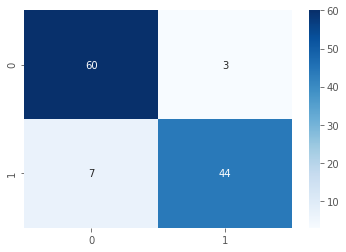

In [54]:
#predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, data,features,labels,regression=False)

## <span style="color:blue">xgboost Classifier</span> 

[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
Accuracy : 96.491%


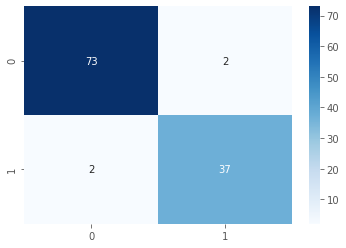

In [55]:
import xgboost as xgb
model = xgb.XGBRegressor(objective="binary:logistic", max_depth = 5,  n_estimators= 500, learning_rate = 0.1 )
classification_model(model,data,features,labels,regression=True)

## <span style="color:blue">SVM</span> 

Accuracy : 84.211%


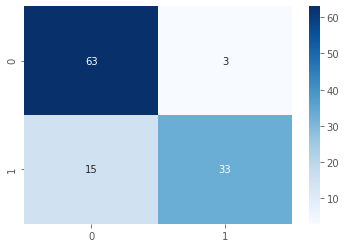

In [56]:
from sklearn import svm
model = svm.SVC()
classification_model(model, data,features,labels,regression=False)

## <span style="color:blue">Grid search to fine tune XGBoost parameters</span> 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid of hyperparameters to search over
param_grid_gb = {'learning_rate': [0.01,0.1,0.5,0.9],'n_estimators' : [100,200,300,400,500,600],'subsample' : [0.3,0.5,0.9],'max_depth' : [3,5,7,9]}

# Regressor Instantiation
gb = xgb.XGBRegressor(objective="binary:logistic", random_state=42)

mse_grid = GridSearchCV(estimator = gb, param_grid = param_grid_gb, scoring = 'neg_mean_squared_error', cv = 4, verbose = 1)
mse_grid.fit(data[features],data[labels])

print("Best parameters: ", mse_grid.best_params_)


Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}   
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)
csv.fit(data[features], data[labels])
csv.best_params_